<img src="logos.jpg" width="700" />

# Twitter dataset analysis

The purpose of this code is to analyze the viability of the dataset obtained from the Twitter API using the keyword __China__ 


Code main elements:

1. All the code was implemented in Python 2.7 https://www.python.org/
2. The  Python packages required to run the programs are the following:
    * Jupyter notebook (Python interactive prompt) http://jupyter.org/index.html
    * Matplotlib (visualization) https://matplotlib.org/
3. The elements associated to each tweet download correspond to the following: 
   https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object    


## Statsitical elements

1. Get the dataset file names (of the notebook current path).


In [1]:
import os
fileNames=[]
currentFilePath  = os.getcwd()
fileNames =[f for f in os.listdir(currentFilePath) if f.endswith(".json")]
print fileNames

['10-10-2018.json', '11-10-2018.json', '12-10-2018.json', '13-10-2018.json', '14-10-2018.json', '15-10-2018.json', '16-10-2018.json', '17-10-2018.json', '18-10-2018.json', '19-10-2018.json', '20-10-2018.json']


2\. Open each json file and obtain the number of tweets for each file and in general.

In [2]:
import codecs
NumberTweets=0
for jsonfile in fileNames:
    print "File: "+jsonfile
    numberTweetFile=0
    with codecs.open(jsonfile, "r" ,"UTF-8") as file:
        for line in file:
            numberTweetFile+=1
            NumberTweets+=1
    print "Number of Tweets:"+str(numberTweetFile)
print "Total number of Tweets:"+str(NumberTweets)      

File: 10-10-2018.json
Number of Tweets:11244
File: 11-10-2018.json
Number of Tweets:18957
File: 12-10-2018.json
Number of Tweets:22602
File: 13-10-2018.json
Number of Tweets:26496
File: 14-10-2018.json
Number of Tweets:22576
File: 15-10-2018.json
Number of Tweets:25550
File: 16-10-2018.json
Number of Tweets:28284
File: 17-10-2018.json
Number of Tweets:30989
File: 18-10-2018.json
Number of Tweets:17994
File: 19-10-2018.json
Number of Tweets:25745
File: 20-10-2018.json
Number of Tweets:35712
Total number of Tweets:266149


3\. Show a tweet (text) obtained from the Twitter API (JSON format).

In [3]:
import codecs
import json
with codecs.open(fileNames[0], "r" ,"UTF-8") as file:
     jsonData = json.loads((file.readline()).replace('\n', ''))
     print jsonData 

{u'quote_count': 0, u'contributors': None, u'truncated': False, u'text': u'RT @Kostian_V: "#China rewrote a law to force Xinjiang #Muslims into \u201cpsychological correction\u201d camps" https://t.co/dkTqnAWmW3', u'is_quote_status': False, u'in_reply_to_status_id': None, u'reply_count': 0, u'id': 1050084738936033280L, u'favorite_count': 0, u'source': u'<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', u'retweeted': False, u'coordinates': None, u'timestamp_ms': u'1539194686050', u'entities': {u'user_mentions': [{u'indices': [3, 13], u'screen_name': u'Kostian_V', u'id': 260706920, u'name': u'Ville Kostian', u'id_str': u'260706920'}], u'symbols': [], u'hashtags': [{u'indices': [16, 22], u'text': u'China'}, {u'indices': [55, 63], u'text': u'Muslims'}], u'urls': [{u'url': u'https://t.co/dkTqnAWmW3', u'indices': [103, 126], u'expanded_url': u'https://qz.com/1419110/chinas-re-education-camps-for-uyghur-muslims-in-xinjiang-are-now-backed-by-law/amp/', u'di

4\. Get the number of different users that tweet something associated to the __China__ keyword.

In [4]:
import codecs
import json
users=0
for jsonfile in fileNames:
    print "File: "+jsonfile
    userFile={}
    with codecs.open(jsonfile, "r" ,"UTF-8") as file:
        try:
            for line in file:
                
                jsonData = json.loads(line.replace('\n', ''))

                if jsonData["id_str"] not in userFile:
                    userFile[jsonData["id_str"]]=0
                else:
                    userFile[jsonData["id_str"]]+=1
                    
        except BaseException as e:
            pass
    users+=len(userFile)    
    print "Number of distinct users:"+str(len(userFile)) 
print "Number of distinct users in all the dataset:"+str(users)      

File: 10-10-2018.json
Number of distinct users:11224
File: 11-10-2018.json
Number of distinct users:1971
File: 12-10-2018.json
Number of distinct users:730
File: 13-10-2018.json
Number of distinct users:26475
File: 14-10-2018.json
Number of distinct users:9821
File: 15-10-2018.json
Number of distinct users:20952
File: 16-10-2018.json
Number of distinct users:8733
File: 17-10-2018.json
Number of distinct users:1579
File: 18-10-2018.json
Number of distinct users:3663
File: 19-10-2018.json
Number of distinct users:20640
File: 20-10-2018.json
Number of distinct users:1089
Number of distinct users in all the dataset:106877


5\. Show popular topics and users mentioned in the tweets from the dataset (Hashtags-# and users-@).

File: 10-10-2018.json
File: 11-10-2018.json
File: 12-10-2018.json
File: 13-10-2018.json
File: 14-10-2018.json
File: 15-10-2018.json
File: 16-10-2018.json
File: 17-10-2018.json
File: 18-10-2018.json
File: 19-10-2018.json
File: 20-10-2018.json


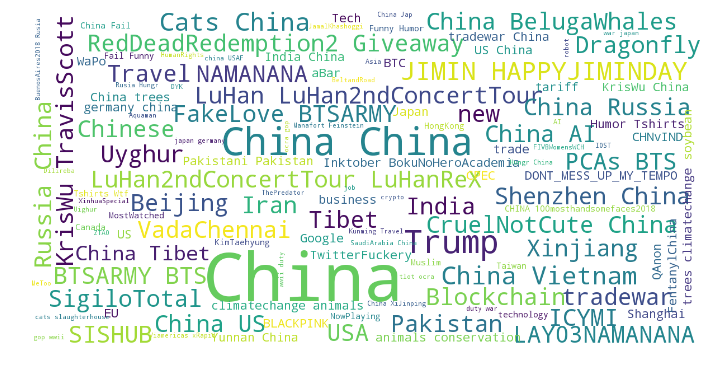

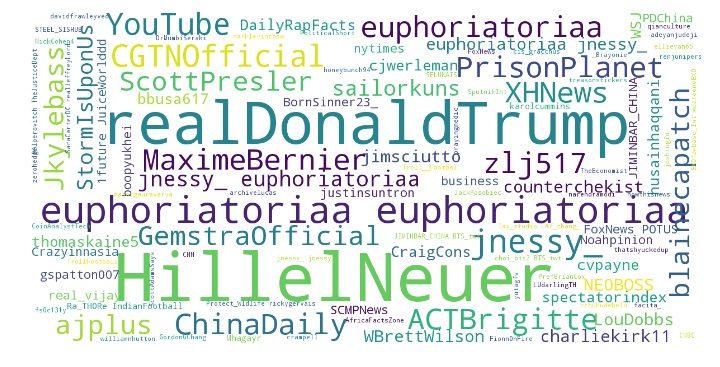

In [5]:
%matplotlib inline
import codecs
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
topics=[]
users=[]
for jsonfile in fileNames:
    print "File: "+jsonfile
    with codecs.open(jsonfile, "r" ,"UTF-8") as file:
        try:
            for line in file: 
              jsonData = json.loads(line.replace('\n', ''))
              [topics.append(x["text"].encode('utf-8')) for x in jsonData["entities"]["hashtags"]]
              [users.append(x["screen_name"].encode('utf-8')) for x in jsonData["entities"]["user_mentions"]]
        except BaseException as e:
            pass

stopwords = set(STOPWORDS)        

textTopics=" ".join(topics) 
featuresWordCloud=textTopics
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(featuresWordCloud))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()  

textUsers=" ".join(users)
featuresWordCloud=textUsers
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(featuresWordCloud))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show() 

6\. Number of distinct topics and users mentioned in the tweets from the dataset.

In [6]:
from collections import Counter
numberTopics=Counter(topics)
numberUsers=Counter(users)
print "Number of distinct topics mentioned in all the dataset: "+str(len(numberTopics))
print "Number of distinct users mentioned in all the dataset: "+str(len(numberUsers))

Number of distinct topics mentioned in all the dataset: 7689
Number of distinct users mentioned in all the dataset: 24338


7\. Find the number of geolocated tweets in the dataset.

In [7]:
import codecs
import json
geolocatedTweets=0
for jsonfile in fileNames:
    print "File: "+jsonfile
    geolocatedFile=0
    with codecs.open(jsonfile, "r" ,"UTF-8") as file:
        try:
            for line in file: 
              jsonData = json.loads(line.replace('\n', ''))
              if jsonData["coordinates"] != None:   
                geolocatedFile+=1
        except BaseException as e:
            pass
    geolocatedTweets+=geolocatedFile
    print "Number of geolocated tweets:"+str(geolocatedFile) 
print "Number of geolocated tweets in all the dataset:"+str(geolocatedTweets)  

File: 10-10-2018.json
Number of geolocated tweets:8
File: 11-10-2018.json
Number of geolocated tweets:5
File: 12-10-2018.json
Number of geolocated tweets:1
File: 13-10-2018.json
Number of geolocated tweets:28
File: 14-10-2018.json
Number of geolocated tweets:12
File: 15-10-2018.json
Number of geolocated tweets:36
File: 16-10-2018.json
Number of geolocated tweets:11
File: 17-10-2018.json
Number of geolocated tweets:5
File: 18-10-2018.json
Number of geolocated tweets:11
File: 19-10-2018.json
Number of geolocated tweets:21
File: 20-10-2018.json
Number of geolocated tweets:1
Number of geolocated tweets in all the dataset:139


8\. Show popular locations of the tweets issued by users in the dataset.

File: 10-10-2018.json
File: 11-10-2018.json
File: 12-10-2018.json
File: 13-10-2018.json
File: 14-10-2018.json
File: 15-10-2018.json
File: 16-10-2018.json
File: 17-10-2018.json
File: 18-10-2018.json
File: 19-10-2018.json
File: 20-10-2018.json


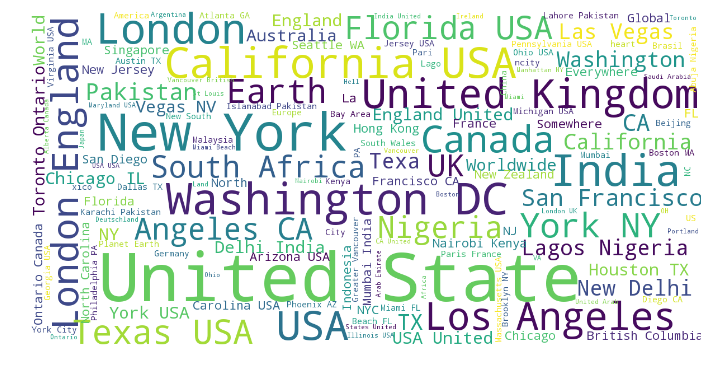

In [9]:
%matplotlib inline
import codecs
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
locations=[]
for jsonfile in fileNames:
    print "File: "+jsonfile
    with codecs.open(jsonfile, "r" ,"UTF-8") as file:
        try:
            for line in file: 
              jsonData = json.loads(line.replace('\n', ''))
              if jsonData["user"]["location"] != None:
                    locations.append(jsonData["user"]["location"].encode('utf-8'))
        except BaseException as e:
            pass
stopwords = set(STOPWORDS)        
textLocations=" ".join(locations) 
featuresWordCloud=textLocations
wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1).generate(str(featuresWordCloud))
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()  